## **Amatya Pathak**

BMIN-GA 1001 Bioinformatics

Assignment 1: Biomarker Discovery

### Importations:

In [29]:
from ftplib import FTP
import gzip
import os

#Data Processing
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Trisecting dataset URL for FTP package compatibility, and logging into NCBI Geo Portal:

In [30]:
HOST_NAME = 'ftp.ncbi.nlm.nih.gov'
HOST_DATA_PATH = 'geo/series/GSE113nnn/GSE113513/matrix/'
HOST_FILE_NAME = 'GSE113513_series_matrix.txt.gz'

ftp = FTP(HOST_NAME)
ftp.login()
ftp.cwd(HOST_DATA_PATH)

'250 CWD command successful'

### Creating data\raw directory, downloading and opening extracted binary file from .gz, and evaluating first 75 lines to determine file format:

In [31]:
RAW_DATA_DIR = './data/raw/'

if not os.path.exists(RAW_DATA_DIR):
    os.makedirs(RAW_DATA_DIR)

ftp.retrbinary(
    'RETR {}'.format(HOST_FILE_NAME) , 
    open('{}{}'.format(RAW_DATA_DIR, HOST_FILE_NAME), 'wb').write
)

with gzip.open('{}{}'.format(RAW_DATA_DIR, HOST_FILE_NAME)) as fh:
    for i, line in enumerate(fh.readlines()):
        print(line)
        if i == 75:
            break

b'!Series_title\t"Gene expression profile of human colorectal carcinoma"\n'
b'!Series_geo_accession\t"GSE113513"\n'
b'!Series_status\t"Public on Apr 24 2018"\n'
b'!Series_submission_date\t"Apr 23 2018"\n'
b'!Series_last_update_date\t"Aug 23 2018"\n'
b'!Series_summary\t"Despite steady progress in the diagnosis and treatment of colorectal cancer (CRC), overall therapeutic outcomes remain unsatisfactory. Therefore, a better understanding of the molecular mechanisms of CRC is urgently needed. Fourteen pairs of cancerous and matched non-cancerous tissues (at least 5 cm away) were obtained from CRC patients undergoing surgical resection. Affymetrix human GeneChip primeview array was conducted to identify differentially expressed genes (DEGs) between CRC tissues and matched adjacent normal tissues. cDNA microarray analysis of cancerous and paired noncancerous tissues from CRC patients revealed 1,868 DEGs, of which 778 in primary lesions were up-regulated and 1,090 were down-regulated."\n'
b'!

### Configuring matplotlib graph size and background:

In [32]:
# generate plots in jupyter notebook
%matplotlib inline

# set the figure size and background style
sns.set(rc={'figure.figsize':(12,6), 'figure.dpi': 150})
sns.set_style("whitegrid")

### Reading the Data into a Pandas Dataframe:
Ignoring lines starting with ! and using \t as the separation flag

Printing resulting dataframe dimensions and top 5 rows:

In [33]:
RAW_DATA_DIR = './data/raw/'
RAW_DATA_FILENAME = 'GSE113513_series_matrix.txt.gz'

df = pd.read_csv('{}{}'.format(RAW_DATA_DIR, RAW_DATA_FILENAME), comment='!', sep='\t')

df = df.set_index('ID_REF')
print(df.shape)
df.head(5)

(49395, 28)


,GSM3108231,GSM3108232,GSM3108233,GSM3108234,GSM3108235,GSM3108236,GSM3108237,GSM3108238,GSM3108239,GSM3108240,...,GSM3108249,GSM3108250,GSM3108251,GSM3108252,GSM3108253,GSM3108254,GSM3108255,GSM3108256,GSM3108257,GSM3108258
ID_REF,,,,,,,,,,,,,,,,,,,,,
11715100_at,20.550440,27.800337,16.569454,16.016920,18.516483,19.599030,14.035622,18.630518,15.249186,16.836504,...,113.981920,22.238367,24.411734,26.851763,15.015553,15.305097,17.580502,31.714455,20.180305,23.165363
11715101_s_at,38.911007,53.513405,36.890644,43.052690,47.595444,48.847095,40.725403,47.139206,41.869810,49.687460,...,129.334660,44.873833,53.241310,56.720863,46.001324,32.304096,41.219917,63.588040,51.425312,53.734013
11715102_x_at,25.829760,33.444916,19.229105,22.094769,26.349796,28.435322,20.063507,26.510470,18.727713,23.065104,...,138.105850,31.332518,30.892340,36.963127,23.635046,21.627863,25.500513,45.372900,28.139097,32.395504
11715103_x_at,35.282680,73.262596,48.691338,45.083103,53.573290,54.268870,44.542330,50.405674,99.521520,65.252560,...,41.392715,54.757560,49.036583,81.832380,43.837696,55.213245,85.297730,61.277780,74.371240,71.067116
11715104_s_at,20.890873,40.296627,47.897854,74.160830,67.538360,70.464090,46.969917,20.381641,30.333733,71.361900,...,19.147799,16.765242,17.671259,15.452515,18.031252,19.746616,15.258782,16.930073,15.564357,16.993692


### Extracting Metadata: 
Loading file in a list where each element is one line:

In [34]:
META_DATA_RAW = []
with gzip.open('{}{}'.format(RAW_DATA_DIR, RAW_DATA_FILENAME)) as fh:
    for line in fh.readlines():
        # convert the line from binary to utf and remove white spaces
        l = line.decode().strip()
        # if the line is not empty and the first character is a '!'
        if l and l[0] == '!':
            META_DATA_RAW.append(l)

# Output the first 5 lines
META_DATA_RAW[:5]

['!Series_title\t"Gene expression profile of human colorectal carcinoma"',
 '!Series_geo_accession\t"GSE113513"',
 '!Series_status\t"Public on Apr 24 2018"',
 '!Series_submission_date\t"Apr 23 2018"',
 '!Series_last_update_date\t"Aug 23 2018"']

### Convert metadata into dictionary:

In [35]:
def split_string(string):
    tmp = string.strip('!').split('\t', 1)
    # if there was a split, assign key and value to the two parts, else assign is None
    key, value = tmp if len(tmp) > 1 else (tmp[0], None)

    if value:
        value = value.replace('"', '').split('\t')
    return key, value

META_DATA = dict(map(split_string, META_DATA_RAW))
print(META_DATA.keys())

dict_keys(['Series_title', 'Series_geo_accession', 'Series_status', 'Series_submission_date', 'Series_last_update_date', 'Series_summary', 'Series_overall_design', 'Series_type', 'Series_contributor', 'Series_sample_id', 'Series_contact_name', 'Series_contact_email', 'Series_contact_department', 'Series_contact_institute', 'Series_contact_address', 'Series_contact_city', 'Series_contact_state', 'Series_contact_zip/postal_code', 'Series_contact_country', 'Series_supplementary_file', 'Series_platform_id', 'Series_platform_taxid', 'Series_sample_taxid', 'Series_relation', 'Sample_title', 'Sample_geo_accession', 'Sample_status', 'Sample_submission_date', 'Sample_last_update_date', 'Sample_type', 'Sample_channel_count', 'Sample_source_name_ch1', 'Sample_organism_ch1', 'Sample_characteristics_ch1', 'Sample_treatment_protocol_ch1', 'Sample_molecule_ch1', 'Sample_extract_protocol_ch1', 'Sample_label_ch1', 'Sample_label_protocol_ch1', 'Sample_taxid_ch1', 'Sample_hyb_protocol', 'Sample_scan_prot

### Now we can label dataset by metadata using dict key syntax:

In [36]:
# display the geo accessions using the dict
META_DATA['Sample_geo_accession']

['GSM3108231',
 'GSM3108232',
 'GSM3108233',
 'GSM3108234',
 'GSM3108235',
 'GSM3108236',
 'GSM3108237',
 'GSM3108238',
 'GSM3108239',
 'GSM3108240',
 'GSM3108241',
 'GSM3108242',
 'GSM3108243',
 'GSM3108244',
 'GSM3108245',
 'GSM3108246',
 'GSM3108247',
 'GSM3108248',
 'GSM3108249',
 'GSM3108250',
 'GSM3108251',
 'GSM3108252',
 'GSM3108253',
 'GSM3108254',
 'GSM3108255',
 'GSM3108256',
 'GSM3108257',
 'GSM3108258']

In [37]:
# display the sample source
META_DATA['Sample_source_name_ch1']

['non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'non-cancerous colorectal tissue',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues',
 'colorectal carcinoma tissues']

### Joining sample source and GEO number arrays into a dict to be added to the dataframe:

In [38]:
# create a dictionary by merging the geo accessions with the source names
samples = dict(zip(META_DATA['Sample_geo_accession'], META_DATA['Sample_source_name_ch1']))
samples

{'GSM3108231': 'non-cancerous colorectal tissue',
 'GSM3108232': 'non-cancerous colorectal tissue',
 'GSM3108233': 'non-cancerous colorectal tissue',
 'GSM3108234': 'non-cancerous colorectal tissue',
 'GSM3108235': 'non-cancerous colorectal tissue',
 'GSM3108236': 'non-cancerous colorectal tissue',
 'GSM3108237': 'non-cancerous colorectal tissue',
 'GSM3108238': 'non-cancerous colorectal tissue',
 'GSM3108239': 'non-cancerous colorectal tissue',
 'GSM3108240': 'non-cancerous colorectal tissue',
 'GSM3108241': 'non-cancerous colorectal tissue',
 'GSM3108242': 'non-cancerous colorectal tissue',
 'GSM3108243': 'non-cancerous colorectal tissue',
 'GSM3108244': 'non-cancerous colorectal tissue',
 'GSM3108245': 'colorectal carcinoma tissues',
 'GSM3108246': 'colorectal carcinoma tissues',
 'GSM3108247': 'colorectal carcinoma tissues',
 'GSM3108248': 'colorectal carcinoma tissues',
 'GSM3108249': 'colorectal carcinoma tissues',
 'GSM3108250': 'colorectal carcinoma tissues',
 'GSM3108251': 'co

### We now build two lists, one containing the geo accession numbers of normal samples and the other the carcinoma samples.

In [39]:
norm_samples = list(
    map(lambda x: x[0], 
        filter(lambda x: x[1] == 'non-cancerous colorectal tissue', samples.items())
    )
)

carc_samples = list(
    map(lambda x: x[0], 
        filter(lambda x: x[1] == 'colorectal carcinoma tissues', samples.items())
    )
)
print('NORM: ', ','.join(norm_samples)+"\n")
print('CARC:', ','.join(carc_samples))

NORM:  GSM3108231,GSM3108232,GSM3108233,GSM3108234,GSM3108235,GSM3108236,GSM3108237,GSM3108238,GSM3108239,GSM3108240,GSM3108241,GSM3108242,GSM3108243,GSM3108244

CARC: GSM3108245,GSM3108246,GSM3108247,GSM3108248,GSM3108249,GSM3108250,GSM3108251,GSM3108252,GSM3108253,GSM3108254,GSM3108255,GSM3108256,GSM3108257,GSM3108258


### Using the Metadata on the DataFrame

Now we can use those two lists to subset our dataframe and make sure that the shapes are correct, and that there's no overlap between the two classifications or any null values in the dataframe

In [40]:
print('full DF', df.shape)
print('norm DF', df[norm_samples].shape)
print('carc DF', df[carc_samples].shape)
set(norm_samples).intersection(set(carc_samples))
print('NA values in DF:', df.isna().sum().sum())

full DF (49395, 28)
norm DF (49395, 14)
carc DF (49395, 14)
NA values in DF: 0


### Making a boxenplot

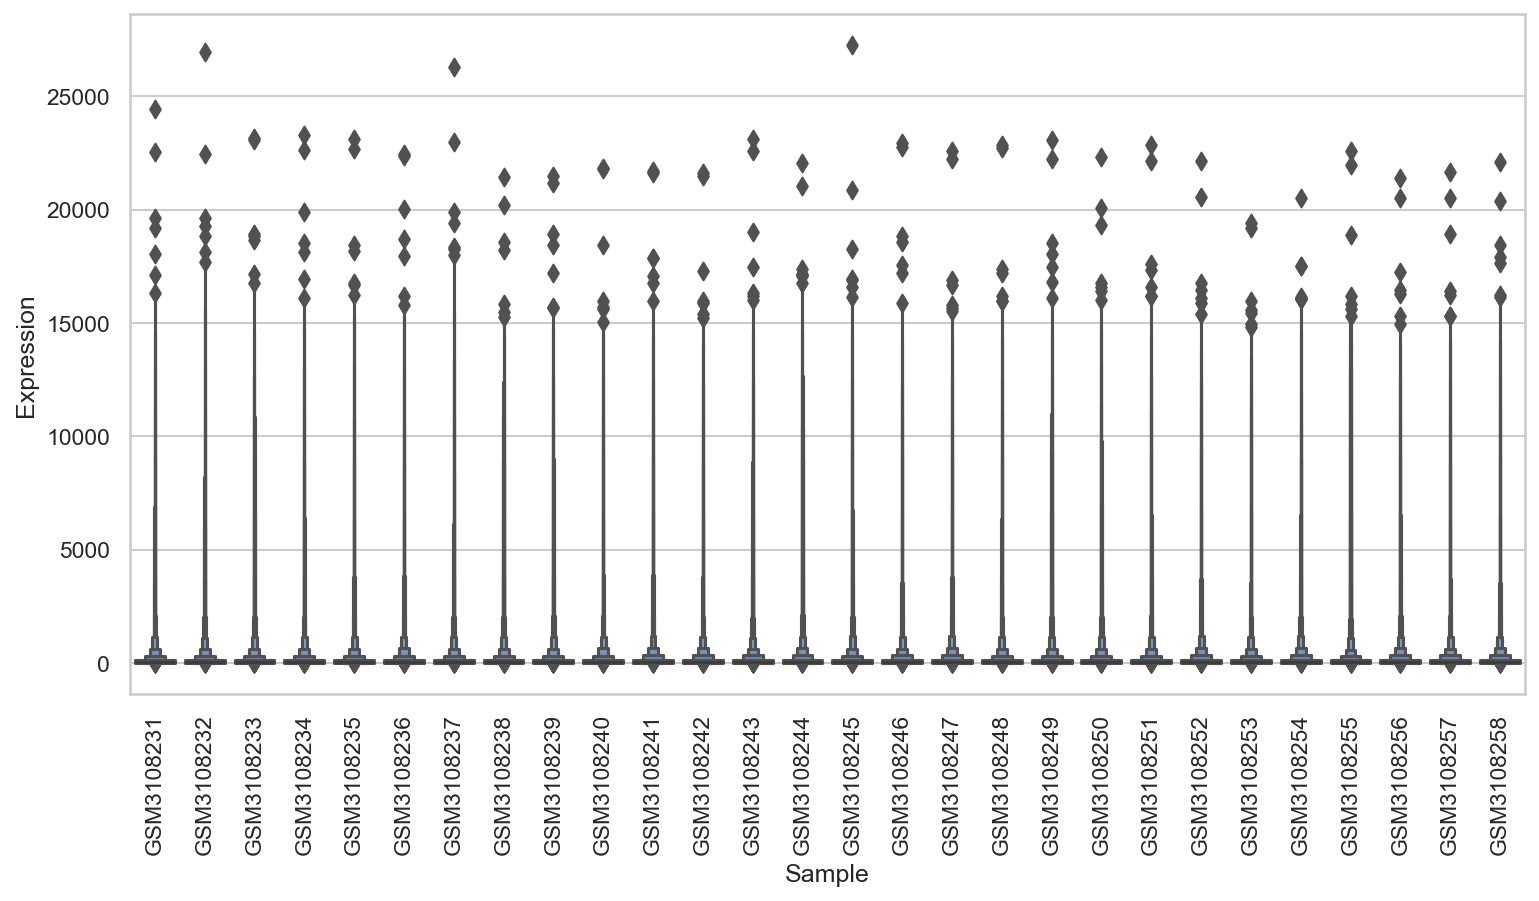

In [41]:
sns.boxenplot(data=df, color='#507fbf')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Sample')
_ = plt.ylabel('Expression')

### Find min and max of each sample to ensure we can log transform:

In [42]:
df.agg(['min', 'max'])

,GSM3108231,GSM3108232,GSM3108233,GSM3108234,GSM3108235,GSM3108236,GSM3108237,GSM3108238,GSM3108239,GSM3108240,...,GSM3108249,GSM3108250,GSM3108251,GSM3108252,GSM3108253,GSM3108254,GSM3108255,GSM3108256,GSM3108257,GSM3108258
min,4.634083,4.114711,4.636095,4.106373,4.617927,4.586085,4.692829,4.439591,4.417433,4.520101,...,4.462939,4.714828,4.689884,4.561475,4.507186,4.481589,4.556063,4.328173,4.467516,4.696504
max,24429.986000,26943.604000,23158.057000,23294.287000,23091.623000,22467.770000,26302.092000,21435.158000,21481.799000,21829.623000,...,23053.873000,22306.450000,22848.572000,22156.537000,19395.520000,20488.219000,22586.572000,21377.256000,21669.990000,22076.611000


### Applying and visualizing log transform: 

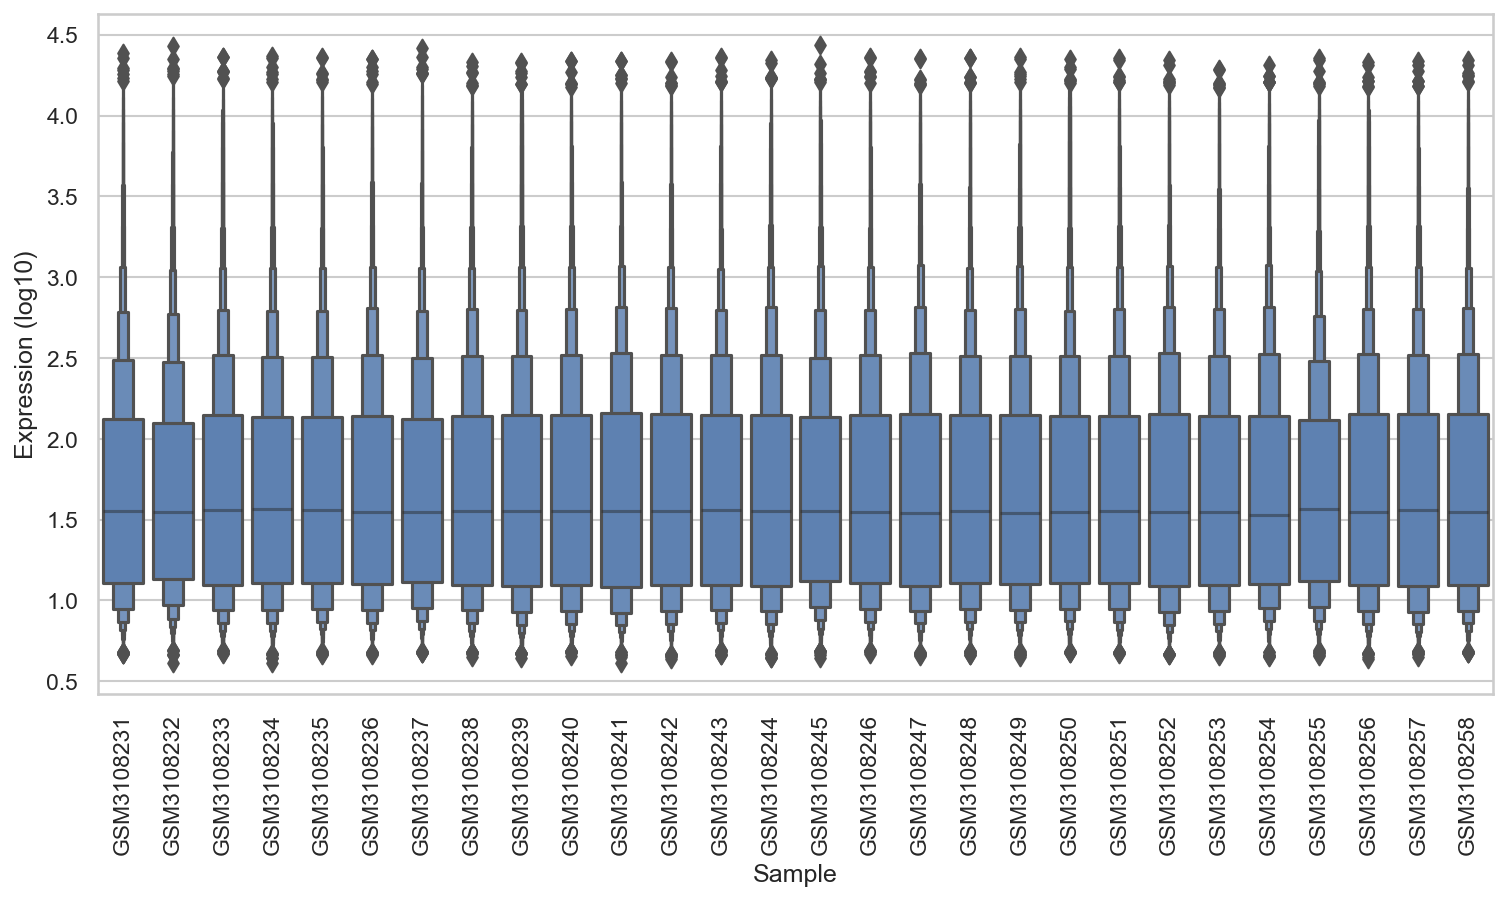

In [44]:
df_log = df.apply(np.log10)
sns.boxenplot(data=df_log, color='#507fbf')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Sample')
_ = plt.ylabel('Expression (log10)')

### Ranking the Genes

Both the ranking method used in the paper, and welch's t-test require the mean and standard deviation for each class across each gene (row).

We can use the agg method to generate a new dataframe containing these metrics for normal and cacinoma samples. These dataframes can then be added onto the original dataframe as new columns.